Version 1.0.3

# Pandas basics 

Hi! In this programming assignment you need to refresh your `pandas` knowledge. You will need to do several [`groupby`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html)s and [`join`]()`s to solve the task. 

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline 

from grader import Grader

In [3]:
DATA_FOLDER = '../readonly/final_project_data/'

transactions    = pd.read_csv(os.path.join(DATA_FOLDER, 'sales_train.csv.gz'))
items           = pd.read_csv(os.path.join(DATA_FOLDER, 'items.csv'))
item_categories = pd.read_csv(os.path.join(DATA_FOLDER, 'item_categories.csv'))
shops           = pd.read_csv(os.path.join(DATA_FOLDER, 'shops.csv'))

The dataset we are going to use is taken from the competition, that serves as the final project for this course. You can find complete data description at the [competition web page](https://www.kaggle.com/c/competitive-data-science-final-project/data). To join the competition use [this link](https://www.kaggle.com/t/1ea93815dca248e99221df42ebde3540).

## Grading

We will create a grader instace below and use it to collect your answers. When function `submit_tag` is called, grader will store your answer *locally*. The answers will *not* be submited to the platform immediately so you can call `submit_tag` function as many times as you need. 

When you are ready to push your answers to the platform you should fill your credentials and run `submit` function in the <a href="#Authorization-&-Submission">last paragraph</a>  of the assignment.

In [4]:
grader = Grader()

# Task

Let's start with a simple task. 

<ol start="0">
  <li><b>Print the shape of the loaded dataframes and use [`df.head`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.head.html) function to print several rows. Examine the features you are given.</b></li>
</ol>

In [5]:

# YOUR CODE GOES HERE
print("Shape of transactions: "+ str(transactions.shape))
transactions.head()

Shape of transactions: (2935849, 6)


,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


Now use your `pandas` skills to get answers for the following questions. 
The first question is:

1. ** What was the maximum total revenue among all the shops in September, 2014?** 


* Hereinafter *revenue* refers to total sales minus value of goods returned.

*Hints:*

* Sometimes items are returned, find such examples in the dataset. 
* It is handy to split `date` field into [`day`, `month`, `year`] components and use `df.year == 14` and `df.month == 9` in order to select target subset of dates.
* You may work with `date` feature as with strings, or you may first convert it to `pd.datetime` type with `pd.to_datetime` function, but do not forget to set correct `format` argument.

In [10]:
newcols = transactions["date"].str.split(".", expand=True)

In [11]:
ls = ["day", "month", "year"]
for i in range(len(ls)):
    transactions.insert(i, ls[i], newcols[i])
transactions.pop("date")

0          02.01.2013
1          03.01.2013
2          05.01.2013
3          06.01.2013
4          15.01.2013
5          10.01.2013
6          02.01.2013
7          04.01.2013
8          11.01.2013
9          03.01.2013
10         03.01.2013
11         05.01.2013
12         07.01.2013
13         08.01.2013
14         10.01.2013
15         11.01.2013
16         13.01.2013
17         16.01.2013
18         26.01.2013
19         27.01.2013
20         09.01.2013
21         16.01.2013
22         27.01.2013
23         27.01.2013
24         29.01.2013
25         27.01.2013
26         06.01.2013
27         26.01.2013
28         02.01.2013
29         06.01.2013
              ...    
2935819    16.10.2015
2935820    22.10.2015
2935821    22.10.2015
2935822    17.10.2015
2935823    26.10.2015
2935824    14.10.2015
2935825    23.10.2015
2935826    04.10.2015
2935827    18.10.2015
2935828    21.10.2015
2935829    03.10.2015
2935830    11.10.2015
2935831    22.10.2015
2935832    26.10.2015
2935833   

In [12]:
data = transactions[(transactions['year'] == '2014') & (transactions['month'] == '09')]

In [13]:
transactions.head()

,day,month,year,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02,01,2013,0,59,22154,999.00,1.0
1,03,01,2013,0,25,2552,899.00,1.0
2,05,01,2013,0,25,2552,899.00,-1.0
3,06,01,2013,0,25,2554,1709.05,1.0
4,15,01,2013,0,25,2555,1099.00,1.0


In [14]:
data["day_revenue"] = data["item_price"]*data["item_cnt_day"]

max_revenue = data.groupby(by='shop_id')['day_revenue'].sum().max()
grader.submit_tag('max_revenue', max_revenue)

Current answer for task max_revenue is: 7982852.2


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Great! Let's move on and answer another question:

<ol start="2">
  <li><b>What item category generated the highest revenue in summer 2014?</b></li>
</ol>

* Submit `id` of the category found.
    
* Here we call "summer" the period from June to August.

*Hints:*

* Note, that for an object `x` of type `pd.Series`: `x.argmax()` returns **index** of the maximum element. `pd.Series` can have non-trivial index (not `[1, 2, 3, ... ]`).

In [15]:
data2 = transactions[(transactions['year'] == '2014')]
data2 = data2[(transactions['month'] == '06') | (transactions['month'] == '07') | (transactions['month'] == '08')]
data2["day_revenue"] = data2["item_price"]*data2["item_cnt_day"]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [16]:
data2['item_category_id'] = [items['item_category_id'].values[i] for i in data2['item_id'].values]

In [17]:
# YOUR CODE GOES HERE
category_id_with_max_revenue =  data2.groupby(by='item_category_id')['day_revenue'].sum().argmax() # PUT YOUR ANSWER IN THIS VARIABLE
grader.submit_tag('category_id_with_max_revenue', category_id_with_max_revenue)

Current answer for task category_id_with_max_revenue is: 20


<ol start="3">
  <li><b>How many items are there, such that their price stays constant (to the best of our knowledge) during the whole period of time?</b></li>
</ol>

* Let's assume, that the items are returned for the same price as they had been sold.

In [18]:
it = transactions.sort_values(by='item_id')
grps = it.groupby(by='item_id')

In [19]:
count = 0
for i in grps['item_price'].unique().values:
    if i.shape[0] == 1:
        count += 1

In [20]:
# YOUR CODE GOES HERE

num_items_constant_price = count
grader.submit_tag('num_items_constant_price', num_items_constant_price)

Current answer for task num_items_constant_price is: 5926


Remember, the data can sometimes be noisy.

<ol start="4">
  <li><b>What was the variance of the number of sold items per day sequence for the shop with `shop_id = 25` in December, 2014? Do not count the items, that were sold but returned back later.</b></li>
</ol>

* Fill `total_num_items_sold` and `days` arrays, and plot the sequence with the code below.
* Then compute variance. Remember, there can be differences in how you normalize variance (biased or unbiased estimate, see [link](https://math.stackexchange.com/questions/496627/the-difference-between-unbiased-biased-estimator-variance)). Compute ***unbiased*** estimate (use the right value for `ddof` argument in `pd.var` or `np.var`). 
* If there were no sales at a given day, ***do not*** impute missing value with zero, just ignore that day

In [21]:
shop_id = 25
data4 = transactions[(transactions['year'] == '2014') & (transactions['month'] == '12')]
data4 = data4.groupby(by='shop_id').get_group(shop_id)
data4.sort_values(by='day')

,day,month,year,date_block_num,shop_id,item_id,item_price,item_cnt_day
2318118,01,12,2014,23,25,18163,349.00,2.0
2317703,01,12,2014,23,25,12448,149.00,1.0
2320340,01,12,2014,23,25,4336,2699.00,1.0
2321803,01,12,2014,23,25,3158,1290.00,1.0
2319880,01,12,2014,23,25,17096,149.00,1.0
2323158,01,12,2014,23,25,6740,499.00,1.0
2321045,01,12,2014,23,25,2808,999.00,1.0
2322114,01,12,2014,23,25,6888,299.00,1.0
2323248,01,12,2014,23,25,5051,299.00,1.0
2318318,01,12,2014,23,25,17302,149.00,1.0


In [25]:
data4["item_revenue"] = data4["item_price"]*data4["item_cnt_day"]
data4.sort_values(by='day')
total_num_items_sold = data4.groupby(by='day')["item_cnt_day"].sum() # YOUR CODE GOES HERE
total_num_items_sold

day
01     153.0
02     169.0
03     195.0
04     164.0
05     300.0
06     350.0
07     325.0
08     209.0
09     204.0
10     143.0
11     214.0
12     297.0
13     432.0
14     305.0
15     225.0
16     192.0
17     285.0
18     325.0
19     418.0
20     579.0
21     379.0
22     318.0
23     371.0
24     433.0
25     505.0
26     620.0
27     743.0
28     662.0
30    1966.0
31     776.0
Name: item_cnt_day, dtype: float64

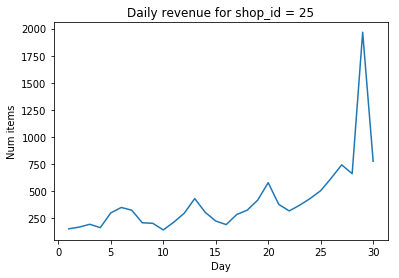

Current answer for task total_num_items_sold_var is: 117167.702299


In [27]:



days = np.arange(1,31)

# Plot it
plt.plot(days, total_num_items_sold)
plt.ylabel('Num items')
plt.xlabel('Day')
plt.title("Daily revenue for shop_id = 25")
plt.show()

total_num_items_sold_var = np.var(total_num_items_sold, ddof=1)
grader.submit_tag('total_num_items_sold_var', total_num_items_sold_var)

## Authorization & Submission
To submit assignment to Cousera platform, please, enter your e-mail and token into the variables below. You can generate token on the programming assignment page. *Note:* Token expires 30 minutes after generation.

In [28]:
STUDENT_EMAIL = "matthew.dicicco38@myhunter.cuny.edu"
STUDENT_TOKEN = "Vm7M3ZuY22q72HzH"
grader.status()

You want to submit these numbers:
Task max_revenue: 7982852.2
Task category_id_with_max_revenue: 20
Task num_items_constant_price: 5926
Task total_num_items_sold_var: 117167.702299


In [29]:
grader.submit(STUDENT_EMAIL, STUDENT_TOKEN)

Submitted to Coursera platform. See results on assignment page!


Well done! :)